In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import string
# Libraries to drop english words and tokenize the text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import contractions

from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
import umap
import matplotlib.pyplot as plt

from pathlib import Path

# Get project path
project_path = Path.cwd().resolve().parent.parent
print(project_path)

/Users/elizavetachefanova/Library/Python/3.9/lib/python/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/elizavetachefanova/Library/Python/3.9/lib/python/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/elizavetachefanova/Library/Python/3.9/lib/python/si

/Users/elizavetachefanova/Documents/Courses/NLP course/Final project


In [2]:
# Data Frame with Train preprocessed data
train_df = pd.read_csv(f'{project_path}/Output/Cleaned_train_data.csv', index_col=0)
# Data Frame with Test preprocessed data
test_df = pd.read_csv(f'{project_path}/Output/Cleaned_test_data.csv', index_col=0)
train_df.head()

,qid,question_text,target,Preprocessed_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,"['quebec', 'nationalists', 'see', 'province', ..."
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,"['adopt', 'dog', 'would', 'encourage', 'people..."
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,"['velocity', 'affect', 'time', 'velocity', 'af..."
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,"['otto', 'von', 'guericke', 'use', 'magdeburg'..."
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,"['convert', 'montra', 'helicon', 'mountain', '..."


---
# <font color=green>Preprocess the data</font>

In [ ]:
# # DataFrame with Test data
# test_df = pd.read_csv(f'/kaggle/input/quora-insincere-questions-classification/test.csv')
# # DataFrame with Train Data
# train_df = pd.read_csv(f'/kaggle/input/quora-insincere-questions-classification/train.csv')

In [13]:
#  The Function for text preprocessing
def tokenize_string(text):

    # Before lemmatizing replace all constructions with normal words
    text_upd = contractions.fix(text)

    # Tokenize the data and use only lower letters
    words = word_tokenize(text_upd.lower())
    
    # Create a lemmatizer object
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos = "v") for word in words] 
    
    # # Get rid of punctuation
    words = [word for word in lemmas if word not in string.punctuation]
    
    # Remove stop words
    # Stop words corpus (179 in total)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return words

In [14]:
# Tokenizing the series for train data
print('I have just started updatind train_df')
train_df['Preprocessed_text'] = train_df.question_text.apply(tokenize_string)

# Tokenizing the series for test data
# print('I have just started updatind test_df')
# test_df['Preprocessed_text'] = test_df.question_text.apply(tokenize_string)

I have just started updatind train_df
I have just started updatind test_df


In [15]:
y_train = train_df.target.values

In [16]:
train_df['Preprocessed_text'].head()

0    [quebec, nationalists, see, province, nation, ...
1    [adopt, dog, would, encourage, people, adopt, ...
2    [velocity, affect, time, velocity, affect, spa...
3    [otto, von, guericke, use, magdeburg, hemisphe...
4    [convert, montra, helicon, mountain, bike, cha...
Name: Preprocessed_text, dtype: object

In [17]:
word2vec_model = Word2Vec(train_df['Preprocessed_text'], vector_size=700, window=5, min_count=5)

Extract the Word2Vec embeddings

In [9]:
word_vectors = word2vec_model.wv
words = list(word_vectors.index_to_key)
vectors = np.array([word_vectors[word] for word in words])

In [18]:
n_words = 100 

# The n_words most common words
words_freq = word2vec_model.wv.get_normed_vectors().sum(axis=1)
most_common_words = np.array(word2vec_model.wv.index_to_key)[np.argsort(words_freq)[-n_words:]]

# Extract the embeddings for these words:
selected_vectors = np.array([word2vec_model.wv[word] for word in most_common_words])

Fit the UMAP model on the embeddings:

In [19]:
reducer = umap.UMAP(n_neighbors=3, min_dist=0.6, n_components=2, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(selected_vectors)

Plot the transformed embeddings

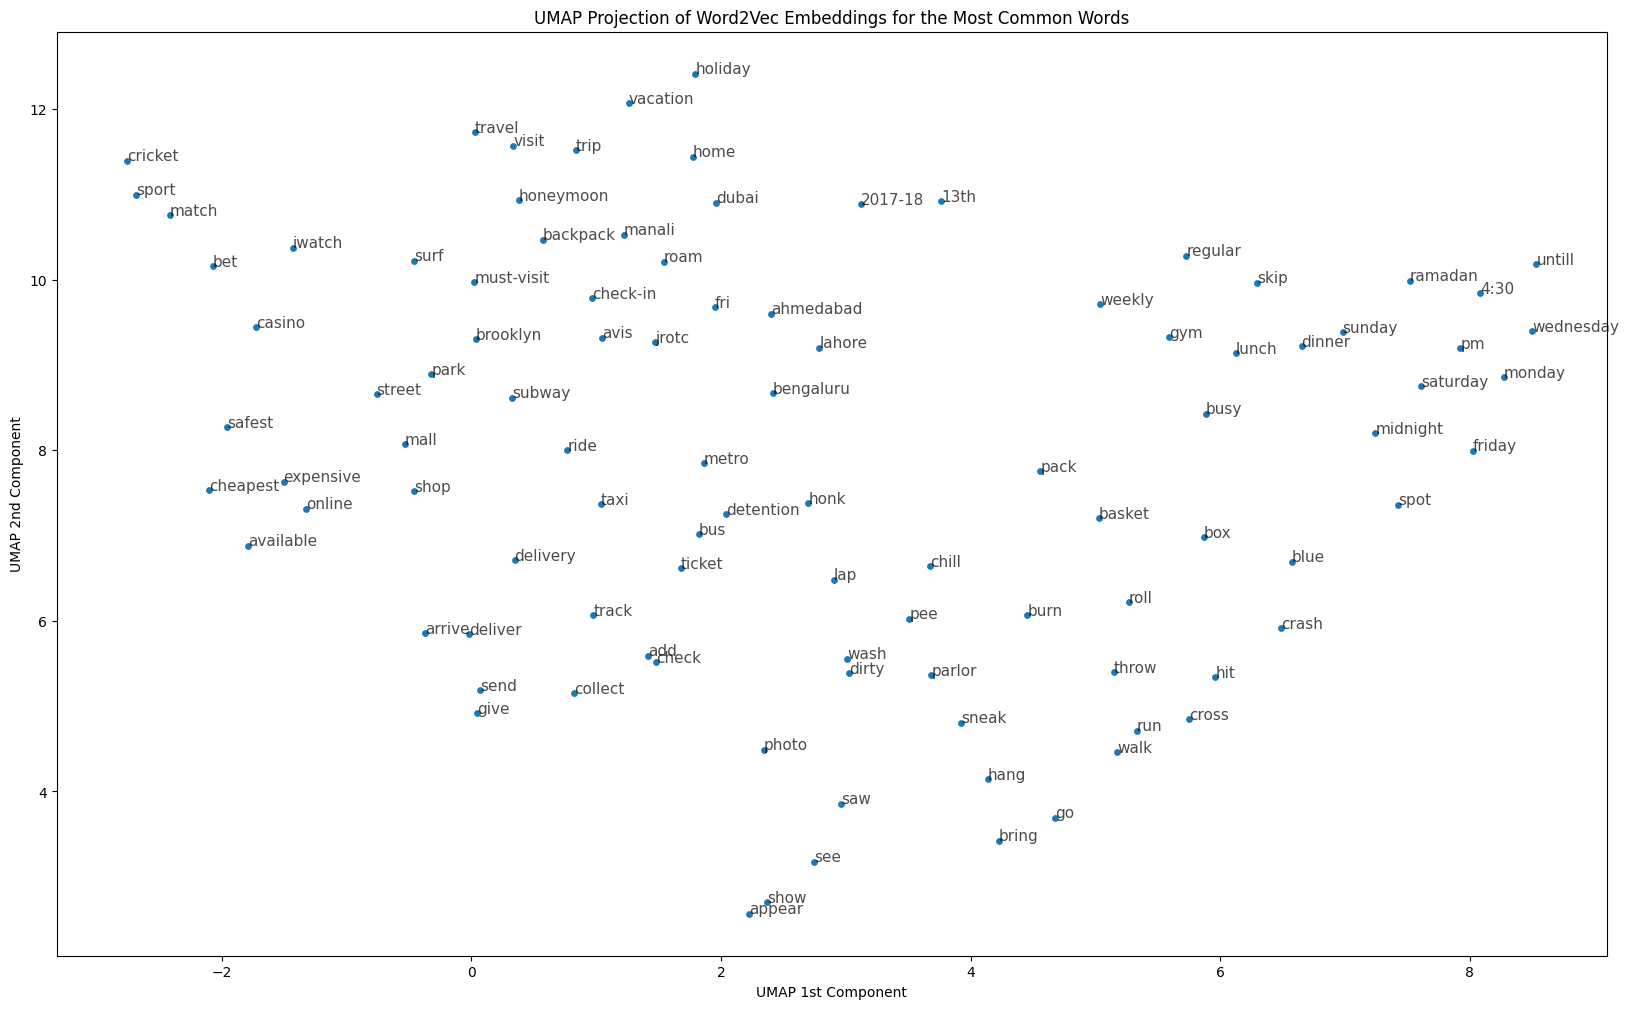

In [20]:
plt.figure(figsize=(20, 12))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=15)
for i, word in enumerate(most_common_words):
    plt.annotate(word, xy=(embedding_2d[i, 0], embedding_2d[i, 1]), alpha=0.7, fontsize=11)

plt.xlabel('UMAP 1st Component')
plt.ylabel('UMAP 2nd Component')
plt.title('UMAP Projection of Word2Vec Embeddings for the Most Common Words')
plt.show()

In [ ]:
# Function for preprocessing the whole phrase instead of separate phrases
def phrase_vector(word2vec_model, phrase):
    phrase = [word for word in phrase if word in word2vec_model.wv.key_to_index]
    
    if len(phrase) == 0:
        return np.zeros(word2vec_model.vector_size)
    
    return np.mean(word2vec_model.wv[phrase], axis=0)

In [ ]:
# Applying the function
X_train_vec = np.array([phrase_vector(word2vec_model, phrase) for phrase in train_df['Preprocessed_text']])
X_test_vec = np.array([phrase_vector(word2vec_model, phrase) for phrase in test_df['Preprocessed_text']])

---
# <font color=green>Creating baseline model based on Logistic Regression</font>

In [ ]:
# log_reg = LogisticRegression(max_iter=10000)
# log_reg.fit(X_train_vec, y_train)

In [ ]:
# Make a prediction with new data
# y_pred = log_reg.predict(X_test_vec)

---
# <font color=green>Creating baseline model based on Catboost</font>

In [ ]:
model = CatBoostClassifier(iterations=200, learning_rate=0.1, 
                           depth=6, loss_function='Logloss', 
                           random_seed=42, task_type="GPU")
model.fit(X_train_vec, y_train, verbose=10)

In [ ]:
y_pred = model.predict(X_test_vec)

In [ ]:
y_pred

In [ ]:
# y_pred = y_pred.ravel()

---
# <font color=green>Making the final file</font>

In [ ]:
pd.DataFrame({'qid': test_df.qid, 'prediction': y_pred}).set_index('qid').to_csv('submission.csv')